In [3]:
# Import:
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # include parent directory in the path
from toolbox.experiment import Experiment
from toolbox.SINDy import SINDy
from toolbox.symbolic_SINDy import symbolic_SINDy
from toolbox.cusum import CUSUM
from toolbox.auxiliary_functions import set_param_freq
from data import SINDy_data, equations

# Seed:
np.random.seed(999)

In [5]:
# Select ODE:
ode_name = 'TVSelkovODE'
ode_param = '0.92,0.1'
freq = 10
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)

# Parameters:

freq_SR = 20
n_sample = 50 
noise_ratio = 0 #0.01
seed = 100 
n_seed = 1 
dt = 1 / freq
dim_x = 3
dim_k = 0
SW_length = 20 # SINDy sliding window length
SW_length_SR = 10 # SR sliding window length
H = 70 # length of the experiment
lazy = False # if True, we do not recompute the building blocks with SR
symbolic = False # if True, SR call is allowed, otw. simple SINDy is used throughout the whole experiment

# CUSUM parameters:
N = 10 # 10
eps = 0.01 
threshold = 0.3 

In [3]:
# Generate data: (6min 18.9sec)
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, 0, H)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# Save data:
file_path = 'saved/data/TVSelkovODE_data.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
with open(file_path, 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

(50, 500, 3) (50, 500, 3) (0,)
['X0', 'X1', 'X2']


In [ ]:
# # Load data:
# file_path = 'saved/data/TVSelkovODE_data.pkl'
# with open(file_path, 'rb') as f:
#     X_list, dX_list, param_list, feature_names = dill.load(f)

In [7]:
# Initialize experiment and model discovery methods:
exp = Experiment(ode, ode_param, freq_SR, n_sample, noise_ratio, seed, n_seed, dt, dim_x, dim_k, SW_length, SW_length_SR, H, lazy, symbolic)

cusum = CUSUM(N, eps, threshold)

SINDy_method = SINDy(degree=3, include_bias=True, threshold=0.1)

SR_method = 'SR-T' # symbolic regression method chosen 
x_id = 0  # equation to be identified by SR 
symbolic_SINDy_method = symbolic_SINDy(SR_method, x_id=0, degree=3)

In [8]:
# Run the experiment:

while exp.T <= exp.H:

    print(f't: {exp.T}')

    # update time-window:
    X_list_t = [x[(exp.T0*freq):(exp.T*freq)] for x in X_list]
    dX_list_t = [dx[(exp.T0*freq):(exp.T*freq)] for dx in dX_list]  

    exp.step_forward(SINDy_method, symbolic_SINDy_method, cusum, X_list_t, dX_list_t, param_list, feature_names)

    # building block search time: 3m 15s
    # total time: 6m 20s

t: 20
SINDy model:
(X0)' = 0.770 1 + 0.106 X1^2 + -1.084 X0 X1^2
(X1)' = -0.456 X1 + -0.570 X1^2 + 1.029 X0 X1^2 + 0.124 X1^3
(X2)' = 1.000 1
Model complexity:  8
Lasso penalty:  5.139162155737678
RMSE:  0.04368002407814466

t: 21
Time:  21
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.0422587249923007

t: 22
Time:  22
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.04378541719774211

t: 23
Time:  23
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.04945757280844816

t: 24
Time:  24
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.05384954618256926

t: 25
Time:  25
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.04697137803653326

t: 26
Time:  26
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.03531700912988521

t: 27
Time:  27
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.02889089780313872

t: 28
Time:  28
CUSUM quantity:  0
CUSUM quantity:  0
Change p

plotting
(450,)
(450,)
(600,)
(600,)
plotting
(450,)
(450,)
(600,)
(600,)


IndexError: list index out of range

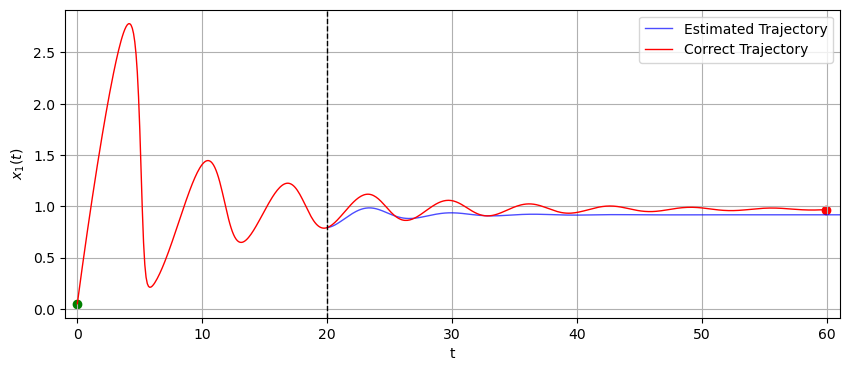

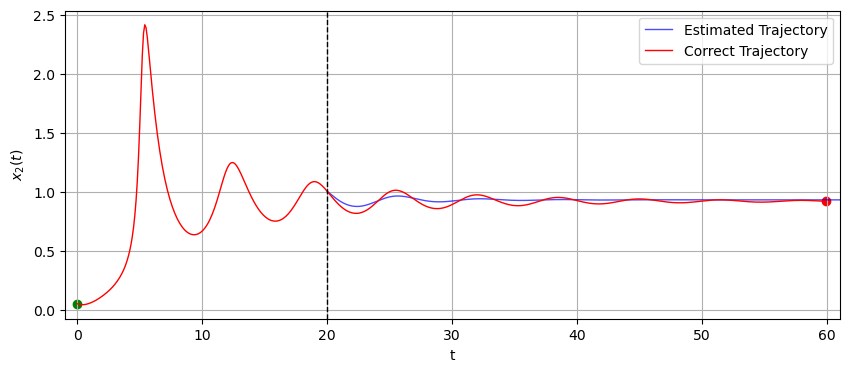

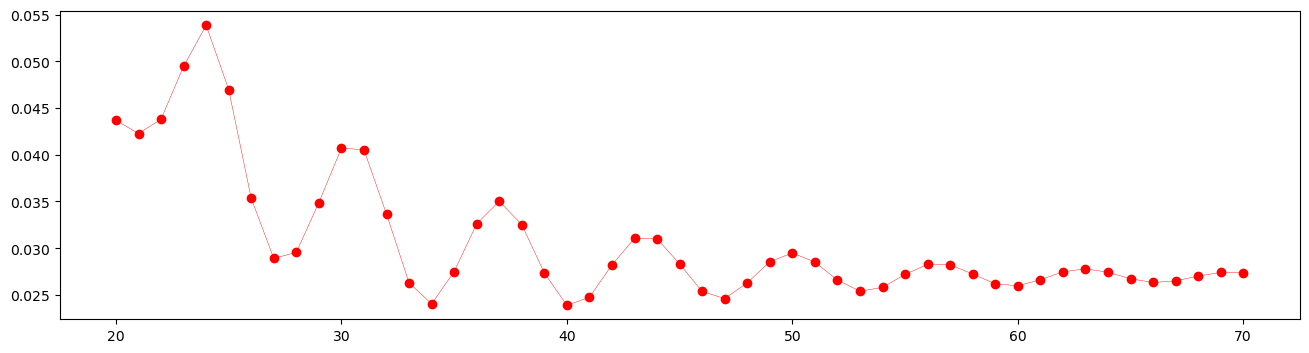

In [9]:
exp.plot()
exp.plot(x_id=1)
exp.plot_RMSE()

plotting
(450,)
(450,)
(600,)
(600,)
plotting
(450,)
(450,)
(600,)
(600,)


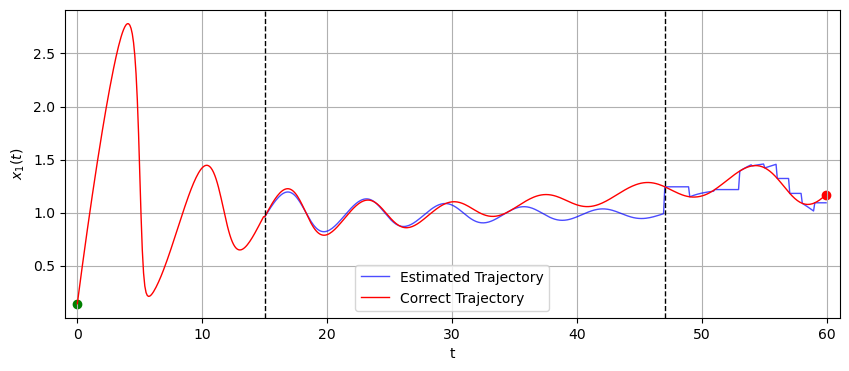

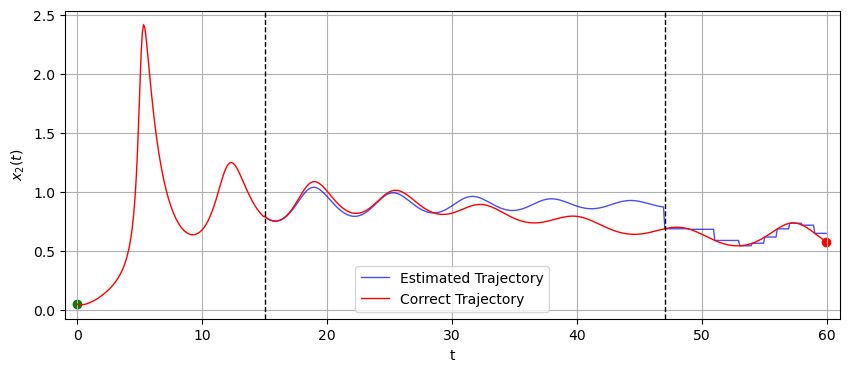

In [8]:
exp.plot()
exp.plot(x_id=1)